# imports

In [2]:
import GeoLeoXtract as glx


ERROR 1: PROJ: proj_create_from_database: Open of /export2/htelg/programs/miniconda3/envs/py310t2.2/share/proj failed


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import nesdis_gml_synergy.satlab as ngs
# import nesdis_aws.nesdis_aws as naws

# Download data

In [12]:
query = glx.cloud_interface.AwsQuery(path2folder_local='/home/grad/htelg/tmp',
                      satellite= 17, #16,
                      product=f'ABI-L2-LST',#f'ABI-L2-AOD',
                      scan_sector='C',
                      start='2021-06-28 21:00:00',#'2020-09-13 18:00:00',
                      end='2021-06-28 21:15:00',#'2020-09-13 18:15:00',
                      process=None,
                    )
query.workplan

,path2file_aws,path2file_local
2021-06-28 21:01:17,noaa-goes17/ABI-L2-LSTC/2021/179/21/OR_ABI-L2-...,/home/grad/htelg/tmp/OR_ABI-L2-LSTC-M6_G17_s20...


In [13]:
query.download()

[None]

# Open file and detect product

In [178]:
reload(glx)
reload(glx.satlab)
reload(glx.opt_imports)

<module 'GeoLeoXtract.opt_imports' from '/home/grad/htelg/prog_dev/GeoLeoXtract/GeoLeoXtract/opt_imports.py'>

In [14]:
p2f = pl.Path('/home/grad/htelg/tmp/OR_ABI-L2-AODC-M6_G16_s20202571801154_e20202571803527_c20202571806364.nc')
p2f = pl.Path('/home/grad/htelg/tmp/OR_ABI-L2-LSTC-M6_G17_s20211792101177_e20211792103550_c20211792104307.nc')
sp = glx.satlab.open_file(p2f)

bubasd


# Projection onto sites

In [15]:
sites = [{'abb': 'XYZ', 'lat': 45, 'lon': -105}]
spos = sp.project_on_sites(sites)
spos.projection2area

<xarray.Dataset>
Dimensions:              (radius: 5, stats: 3, data_quality: 3, site: 1)
Coordinates:
  * radius               (radius) int64 5 10 25 50 100
  * stats                (stats) object 'median' 'mean' 'std'
    t                    datetime64[ns] 2021-06-28T21:02:36.388551040
  * site                 (site) <U3 'XYZ'
  * data_quality         (data_quality) <U11 'high' 'high_medium' 'medium'
Data variables:
    LST                  (data_quality, radius, stats, site) float32 nan ... nan
    num_of_valid_points  (data_quality, radius, site) int64 7 33 ... 821 3293

# projection on shapefile

In [16]:
import geopandas as gpd

In [17]:
fn = '/home/grad/htelg/fundgrube/shape_files/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp'
shape = gpd.read_file(fn)
us = shape[shape.iso_a2 == 'US']
state = us[us.iso_3166_2 == 'US-WA']
# state.plot()

In [18]:
sps = sp.project_on_shape(state)

Text(0.5, 1.0, '2021-06-28 21:01:17.700000+00:00')

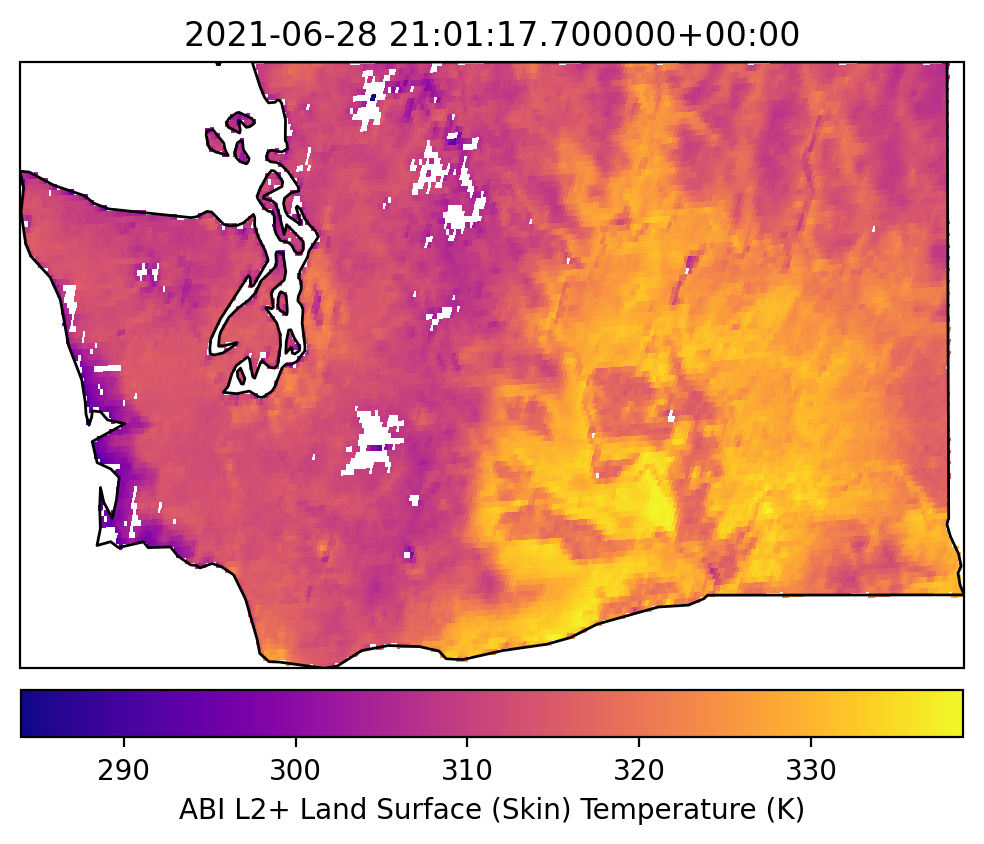

In [39]:
a,pc,_ = sps.plot('LST', show_features=False, shape = state,colorbar = False)
pc.set_cmap(plt.cm.plasma)
f = a.get_figure()
cb = f.colorbar(pc, orientation= 'horizontal', shrink = 0.95, pad = 0.03)
cb.set_label('ABI L2+ Land Surface (Skin) Temperature (K)')
a.set_title(pd.to_datetime(sps.ds.time_coverage_start))

In [ ]:
fn = '/home/grad/htelg/fundgrube/products_satellite_networks_etc/GML_sites/G-RAD/eco_climate_maps/na_cec_eco_l2/NA_CEC_Eco_Level2.shp'
shape = gpd.read_file(fn)
shape = shape.to_crs(epsg=4326)

In [72]:
eco = shape[shape.NA_L2CODE == '7.1']
eco = eco.clip(state)

In [102]:
eco

,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,NA_L2KEY,NA_L1KEY,Shape_Leng,Shape_Area,geometry
1040,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,4.749983e+04,4.849565e+07,"POLYGON ((-122.87017 47.25032, -122.87048 47.2..."
1031,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,5.017002e+04,2.161070e+07,"POLYGON ((-123.98387 46.48016, -123.98424 46.4..."
1039,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,3.532265e+03,7.506212e+05,"POLYGON ((-122.66977 47.33176, -122.66906 47.3..."
1042,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,3.018200e+03,3.266802e+05,"POLYGON ((-122.83017 47.33593, -122.83015 47.3..."
1043,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,7.972902e+04,9.656556e+07,"POLYGON ((-122.43809 47.44179, -122.43815 47.4..."
1045,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,6.544913e+04,7.552181e+07,"MULTIPOLYGON (((-122.53552 47.69807, -122.5356..."
1051,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,2.389367e+05,4.407661e+08,"POLYGON ((-122.58631 48.36625, -122.58682 48.3..."
1056,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,9.971639e+04,7.715296e+07,"MULTIPOLYGON (((-122.87535 48.54805, -122.8756..."
1064,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,1.116503e+05,1.436615e+08,"MULTIPOLYGON (((-123.10207 48.60289, -123.1027..."
1068,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,1.175943e+05,1.499198e+08,"MULTIPOLYGON (((-122.88395 48.66171, -122.8838..."


<AxesSubplot: >

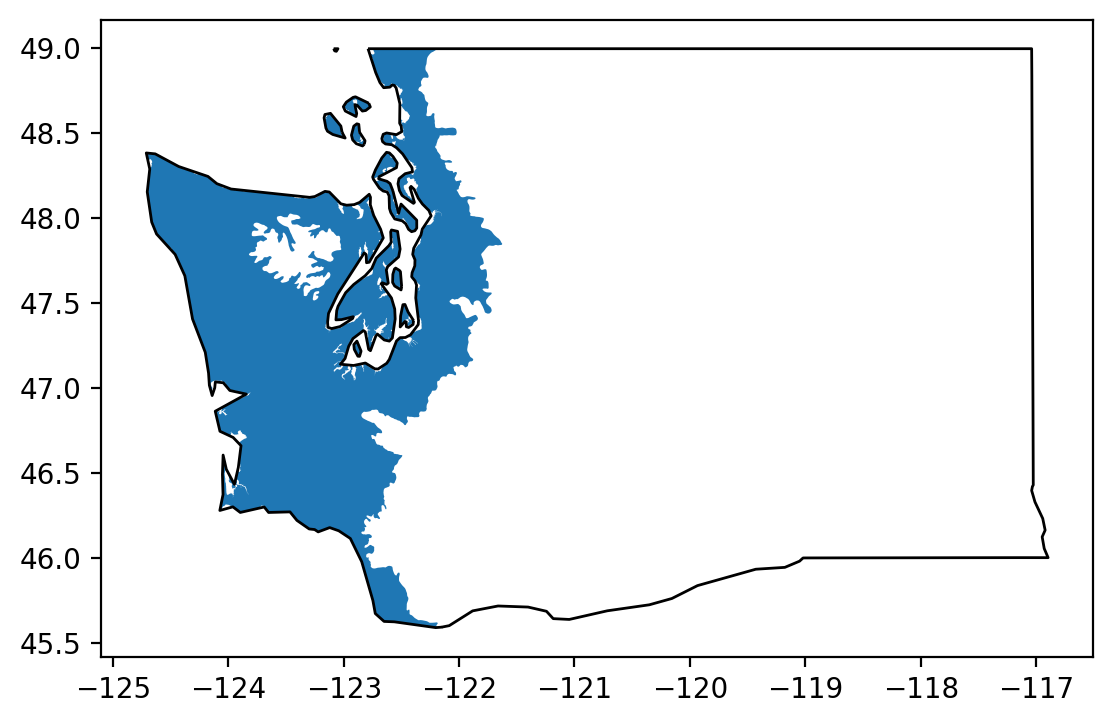

In [73]:
f,a = plt.subplots()
eco.plot(ax = a)
state.plot(ax = a, 
             color="None", )

In [74]:
spse = sps.project_on_shape(eco)

In [80]:
import cartopy

(-125.41862228729298,
 -116.47037174736597,
 45.48457970419321,
 49.08221760437881)

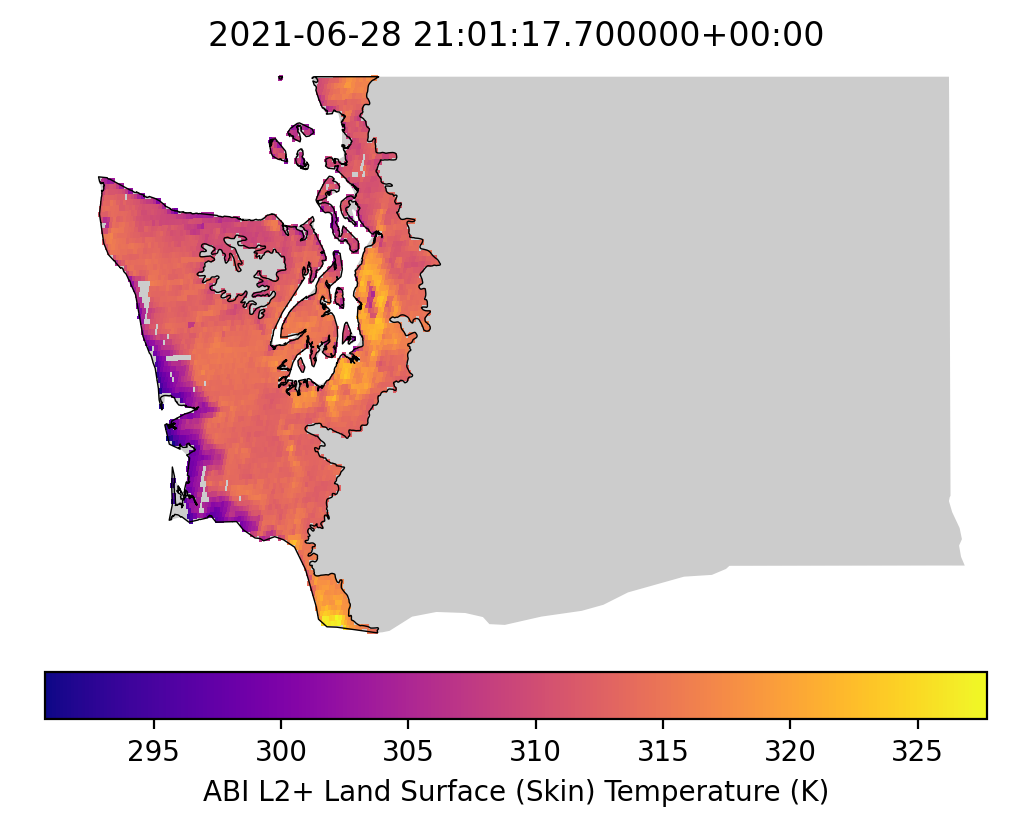

In [101]:
a,pc,_ = spse.plot('LST', show_features=False, 
                   # shape = state,
                   colorbar = False)
pc.set_cmap(plt.cm.plasma)
f = a.get_figure()
cb = f.colorbar(pc, orientation= 'horizontal', shrink = 0.95, pad = 0.03)
cb.set_label('ABI L2+ Land Surface (Skin) Temperature (K)')
a.set_title(pd.to_datetime(sps.ds.time_coverage_start))

state.plot(ax = a, color = '0.8', transform = cartopy.crs.PlateCarree(), zorder = 0)
eco.plot(ax = a, color = 'None', transform = cartopy.crs.PlateCarree(), zorder = 1, lw = 0.5)


a.axis('off')


# Download and process on the fly with `process` kwarg. Files will be discarded after processing